In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import correlate
from statsmodels.graphics.tukeyplot import results


In [197]:
df=pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [217]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000,2421.000000
mean,4.393639,0.487402,4.004957,3.059067,0.487402,6.330442,3.619166,0.496902
std,3.423657,0.499945,2.896845,2.259283,0.499945,4.315341,2.931791,0.500094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,3.000000,0.000000,4.000000,3.000000,0.000000,5.000000,3.000000,0.000000
75%,7.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [200]:
df.dropna( how='any',inplace=True)

<Axes: >

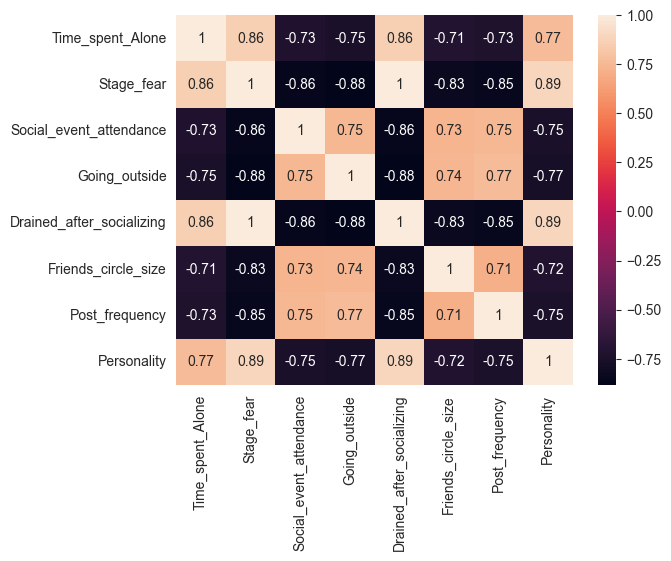

In [220]:
sns.heatmap(df.corr(),annot=True)

THERE SEEMS TO BE OUTLIERS IN EXTROVERTS

/var/folders/lm/l4_8plss0wd58h0bj3c7vhd40000gn/T/ipykernel_48170/1973929281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time_spent_Alone'],kde=True)


<Axes: xlabel='Time_spent_Alone', ylabel='Density'>

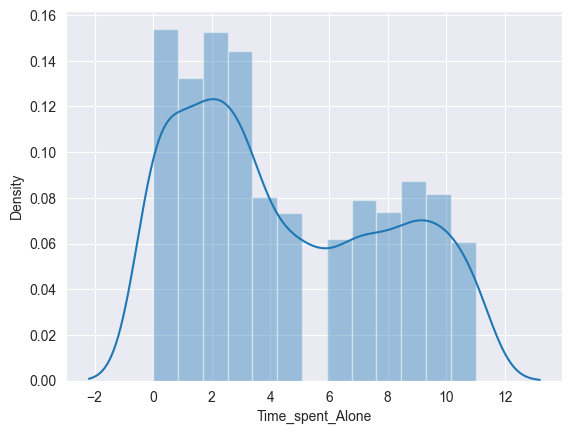

In [202]:
sns.distplot(df['Time_spent_Alone'],kde=True)

In [203]:
df.groupby('Personality')['Time_spent_Alone'].mean()

Personality
Extrovert    2.138932
Introvert    7.046550
Name: Time_spent_Alone, dtype: float64

In [204]:
df.drop(df[(df['Time_spent_Alone'] > 8) & (df['Personality'] == 'Extrovert')].index, inplace=True)

<Axes: xlabel='Personality', ylabel='Time_spent_Alone'>

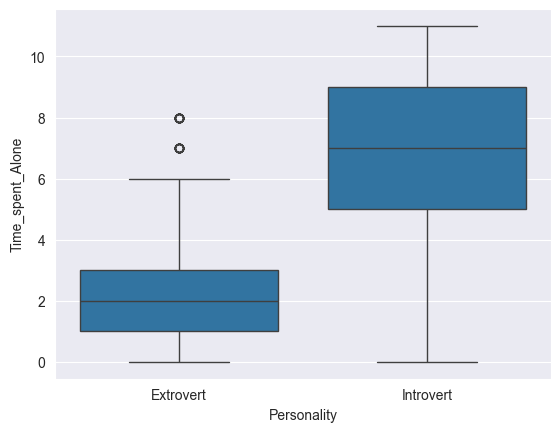

In [205]:
sns.boxplot(y='Time_spent_Alone',x='Personality',data=df)

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [207]:
scaler = StandardScaler()
label= LabelEncoder()
df['Personality'] = label.fit_transform(df['Personality'])
df['Drained_after_socializing']=label.fit_transform(df['Drained_after_socializing'])
df['Stage_fear']=label.fit_transform(df['Stage_fear'])

In [208]:
x=df.drop('Personality',axis=1)
y=df['Personality']
x.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [210]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix,recall_score

In [212]:
model={
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'DecisionTree':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':SVC(),
}
results=[]

In [213]:
for name,clf in model.items():
    clf.fit(x_train_scaled,y_train)
    y_pred = clf.predict(x_test_scaled)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    results.append({'Name': name,
                    'Accuracy': round(accuracy*100,4),
                    'Recall': round(recall*100,4),
                    'F1': round(f1*100,4),
                    'Model': clf, })


In [214]:
for i in results:
    print(i)

{'Name': 'LogisticRegression', 'Accuracy': 94.2268, 'Recall': 92.562, 'F1': 94.1176, 'Model': LogisticRegression()}
{'Name': 'GaussianNB', 'Accuracy': 94.2268, 'Recall': 92.562, 'F1': 94.1176, 'Model': GaussianNB()}
{'Name': 'DecisionTree', 'Accuracy': 90.1031, 'Recall': 88.843, 'F1': 89.9582, 'Model': DecisionTreeClassifier()}
{'Name': 'KNeighborsClassifier', 'Accuracy': 93.8144, 'Recall': 92.562, 'F1': 93.7238, 'Model': KNeighborsClassifier()}
{'Name': 'SVC', 'Accuracy': 94.2268, 'Recall': 92.562, 'F1': 94.1176, 'Model': SVC()}


In [215]:
import joblib


In [216]:
joblib.dump(model['LogisticRegression'], 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']